# Random Forest Regression

## Importing the libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import pandas as pd
import sys
from pylab import rcParams
import seaborn as sb
#np.set_printoptions(threshold=sys.maxsize)

## Importing the dataset

In [38]:
dataset = pd.read_csv('../model/Elastic_model.csv')
dataset_plot = dataset.iloc[:,:3]
X = dataset.iloc[:, :3].values # first 4 column
y = dataset.iloc[:, -1].values # stress

In [39]:
y

array([0.   , 0.   , 0.   , ..., 3.66 , 3.712, 3.866])

## Data Visualization

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [3]:
dataset.boxplot(return_type='dict')
plt.plot()

NameError: name 'dataset' is not defined

### Pairplot

In [2]:

sb.set(font="Times New Roman",style='white')

sb.set_context("talk", font_scale = 4)
sb.pairplot(vars = ['Radius (A°)', 'Coil diameter (A°)', 'Pitch angle (deg)', 'Pitch length (A°)','Stress (GPa)','Strain'],
             data = dataset,
             kind = 'scatter',
             diag_kind = "hist",
             diag_kws = {'alpha':.9},
            height = 10,
            aspect = 1,
            plot_kws=dict(edgecolor="none"))

plt.show()
plt.clf()

NameError: name 'sb' is not defined

### Correlation matrix

In [1]:
plt.figure(figsize=(50,50))
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold' )
dataset_trunc = dataset[['Radius (A°)', 'Coil diameter (A°)', 'Pitch angle (deg)', 'Pitch length (A°)','Stress (GPa)','Strain']]
correlation_mat = dataset_trunc.corr()

sb.heatmap(correlation_mat, annot = True)


plt.show()

NameError: name 'plt' is not defined

## Outlier Detection
A simple approach is eliminating data that are higher than 1.5*(75%-25%) + 75% or
less than 25% - 1.5*(75%-25%)


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
X_df = pd.DataFrame(dataset)
print(X_df.describe())

       Radius  Coil diameter  Pitch angle  ...  Yield stress  Strainend  Toughness
count 4362.00        4362.00      4362.00  ...       4362.00    4362.00    4362.00
mean     6.56           6.78        44.52  ...         23.94       0.71       5.64
std      4.08           3.22        16.59  ...         15.08       0.77       4.88
min      1.45           0.97         2.53  ...          0.90       0.01       0.00
25%      3.79           4.48        32.37  ...         10.37       0.21       2.85
50%      4.95           6.38        44.84  ...         20.83       0.41       3.92
75%      8.14           8.30        55.73  ...         36.68       0.90       6.42
max     26.38          19.15        85.71  ...         67.82       6.21      41.64

[8 rows x 9 columns]


## Splitting the dataset into the Training set and Test set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## hyperparameter tuning

### Random Hyperparameter Grid

In [9]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
from pprint import pprint
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


### Random Search Training

In [10]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [11]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

## PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_

array([0.82446871, 0.15170817, 0.02050708, 0.00331604])

## Training the Random Forest Regression model on the whole dataset

In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 41)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=41)

In [55]:
regressor = RandomForestRegressor(n_estimators= 1000,
min_samples_split= 5,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 10,
 bootstrap = True)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1000)

## Predicting the Test set results

In [56]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=3,suppress=True)
predVSact_test = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
np.savetxt('predVSact_test.csv', predVSact_test, delimiter=',')
print(predVSact_test)

[[0.779 1.335]
 [0.763 0.796]
 [0.593 0.539]
 ...
 [0.092 0.1  ]
 [0.067 0.07 ]
 [0.093 0.121]]


In [58]:
y_pred_train = regressor.predict(X_train)
np.set_printoptions(precision=3,suppress=True)
predVSact_train = np.concatenate((y_pred_train.reshape(len(y_pred_train),1), y_train.reshape(len(y_train),1)),1)
np.savetxt('predVSact_test.csv', predVSact_test, delimiter=',')
print(predVSact_train)

[[0.071 0.068]
 [0.08  0.068]
 [0.714 0.773]
 ...
 [0.068 0.06 ]
 [0.351 0.21 ]
 [0.072 0.03 ]]


## Evaluating the Model Performance

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.03751462947666665

In [60]:
mean_squared_error(y_train, y_pred_train)

0.019978644382944572

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8262088829222044

In [62]:
r2_score(y_train, y_pred_train)

0.9035502980545156

## Feature importances 

### 1. Default Scikit-learn’s feature importances

In [17]:
y_train=pd.DataFrame(data=y_train)
X_train=pd.DataFrame(data=X_train)

In [18]:
import time
import numpy as np

start_time = time.time()
importances = regressor.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in regressor.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.024 seconds


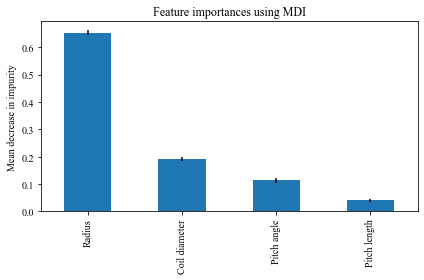

In [19]:
feature_names = list(dataset.columns)[:4]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### 2. Permutation Importance using default sklean

In [20]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    regressor, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 9.691 seconds


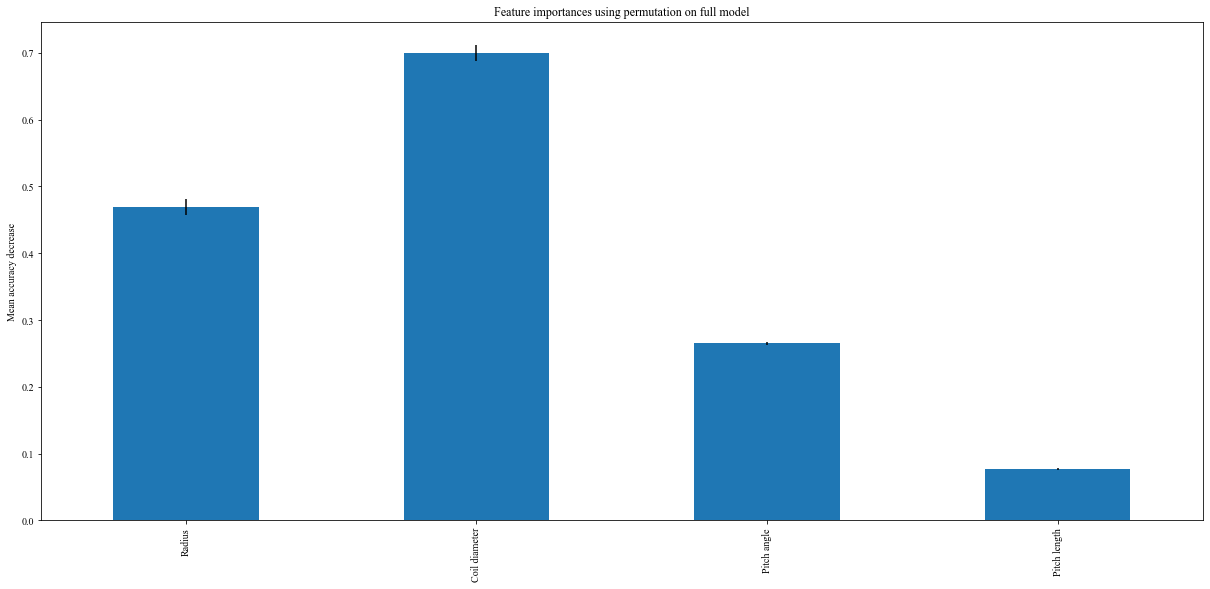

In [21]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5) 
plt.rcParams.update({'font.size': 30})
plt.show()

### 3. Permutation Importance using rfpimp Lib

In [22]:
pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10668 sha256=cf0d08a62dec2f40f41b73ce0952024822b07fed224494ead762f845d33b2fc8
  Stored in directory: c:\users\shahini\appdata\local\pip\cache\wheels\8a\42\e5\d2e9d77df351103d7d16dbc82ce6090cb2f71cee74b7380b7b
Successfully built rfpimp
Note: you may need to restart the kernel to use updated packages.


In [23]:
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, regressor.predict(X_train))

perm_imp_rfpimp = permutation_importances(regressor, X_train, y_train, r2)

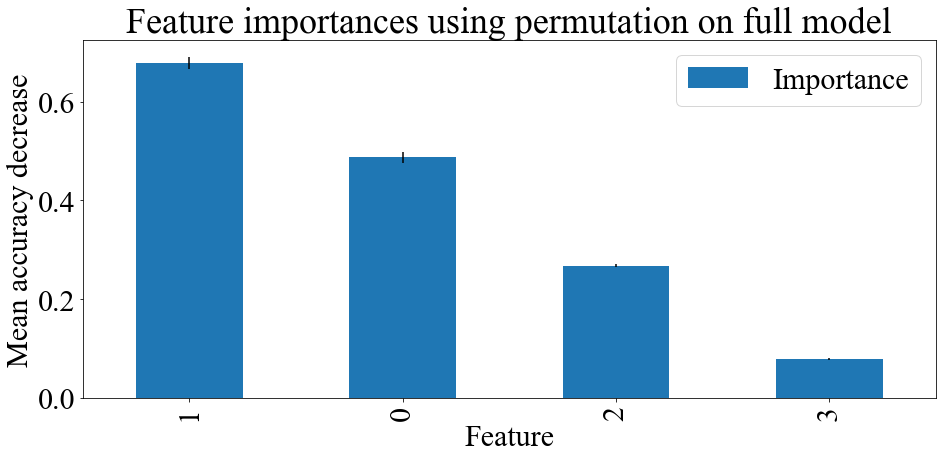

In [24]:
fig, ax = plt.subplots()
perm_imp_rfpimp.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5) 
plt.rcParams.update({'font.size': 30})
plt.show()

## Learning curve

In [30]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [31]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

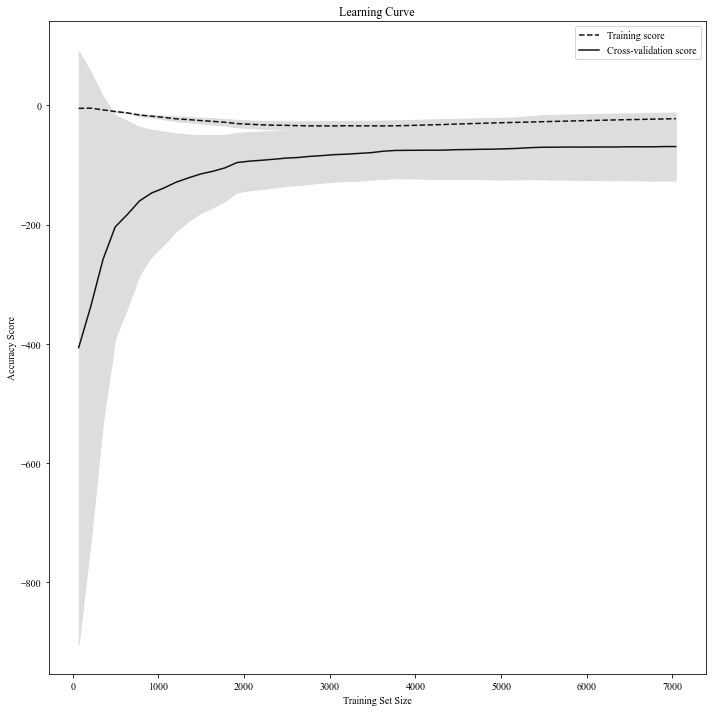

In [32]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Saving the model

In [63]:
import joblib
joblib.dump(regressor, "./RF_EL_strain.joblib")

['./RF_EL_strain.joblib']

In [16]:
import joblib
regressor = joblib.load("./RF_EL.joblib")

In [37]:
regressor.predict([[10,45,10]])

array([5.79])